In [1]:
import numpy as np
from matplotlib import pyplot as plt, patches

#Graph Parameters
plt.rcParams['figure.figsize'] = 12,8
plt.rc('text', usetex=False)
plt.rcParams.update({'font.size': 20,
                     'legend.fontsize': 20})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['lines.linewidth'] = 2

In [2]:
# Coordinate Converter
def rec2rad(x, y):  
    r = np.sqrt(x**2 + y**2)
    thet = np.arctan(y/x) 
    return r, thet

# Coordinate Converter 
def X(r, theta):    
    return  r * np.cos(theta)

def Y(r, theta):
    return  r * np.sin(theta)

# Single Equation

In [745]:
# Derivative squared
def der2(r, l):
    d = ((r**4)/l**2)*(1 - l**2/(r**2) + r_G*l**2/r**3)
    return d

In [746]:
def trajectory(l):
        
    zero = False 
    i = 1
    e = 0.000001
    sign = -1
        
    #Advancing using the average of two steps (this can even be a weighted average)    
    for i in range(1, len(rArray)):
        if zero == False:
            if der2(rArray[i-1], l) < e:
                zero = True
                sign = +1
            else:
                zero = False
        
        if rArray[i-1]<20000 and rArray[i-1]>r_G:
            
            #Runge-Kutta 4th Order
            k1 = dphi * np.sqrt(der2(rArray[i-1], l))
            k2 = dphi * np.sqrt(der2(rArray[i-1]+ k1/2, l))
            k3 = dphi * np.sqrt(der2(rArray[i-1]+ k2/2, l))
            k4 = dphi * np.sqrt(der2(rArray[i-1]+ k3, l))
            
            rArray[i] = rArray[i-1] + sign * (k1 + 2*k2 + 2*k3 + k4)/6
        else:
            break
            
    n = i
    
    #Polar coordinates to cartersian coordinates
    x = X(rArray[0:n], phiArray[0:n])
    y = Y(rArray[0:n], phiArray[0:n])
    
    return x, y

In [747]:
# Defining Constants
r_G = 1
dphi = 0.0001
l_min = 2.5981#3*np.sqrt(3)*r_G/2 + (0.000001)

# Arrays
phiArray = np.arange(0, 5*np.pi, dphi)
rArray = np.zeros(len(phiArray), float)

In [763]:
# Initial Conditions
rArray[0] = 1000

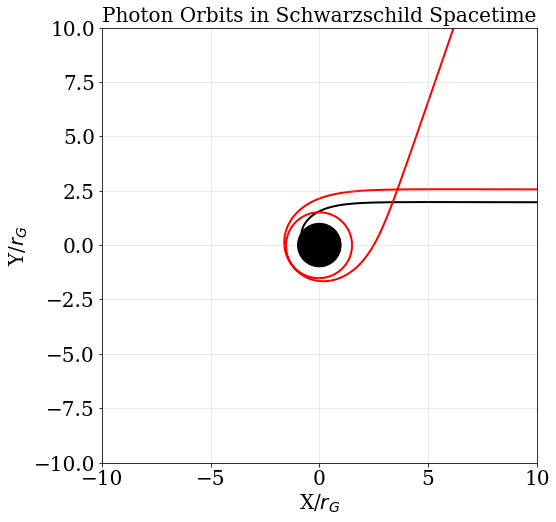

In [764]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(trajectory(2)[0], trajectory(2)[1], color='k', label="l=2", zorder=1)
ax.plot(trajectory(l_min)[0], trajectory(l_min)[1], color='r', label=r'l=$l_{min}$', zorder=1)
# ax.plot(trajectory(3)[0], trajectory(3)[1], color='k',  label="l=3", zorder=10)
# ax.plot(trajectory(4)[0], trajectory(4)[1], color='k', label="l=4", zorder=1)
# # ax.plot(trajectory(6)[0], trajectory(6)[1], color='k', label="l=6", zorder=1)


circle1 = patches.Circle((0, 0), radius=r_G, color='black', zorder=100)
ax.add_patch(circle1)
ax.patch.set_visible(False)
ax.set_xlabel(r"X/$r_G$")
ax.set_ylabel(r"Y/$r_G$")

# plt.legend()
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title("Photon Orbits in Schwarzschild Spacetime")
plt.grid(alpha=0.3)

plt.gca().set_aspect('equal')

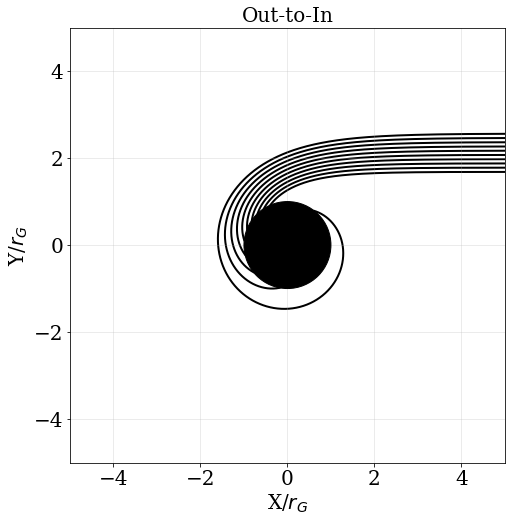

In [768]:
l_val = np.linspace(1.7, 2.59, 10)

fig1 = plt.figure()
ax1 = fig1.add_subplot()

circle1 = patches.Circle((0, 0), radius=r_G, color='black', zorder=100)
ax1.add_patch(circle1)
ax1.patch.set_visible(False)
ax1.set_xlabel(r"X/$r_G$")
ax1.set_ylabel(r"Y/$r_G$")


for i in range(0, len(l_val)):
    l = l_val[i]
    ax1.plot(trajectory(l)[0], trajectory(l)[1], color='k', label="l=2", zorder=1)

# plt.legend()
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.title("Out-to-In")
plt.grid(alpha=0.3)

plt.gca().set_aspect('equal')